The purpose of this notebook is to QA the posterior probability results returned from the Looker visualization in python.  

Resources:
- http://christianherta.de/lehre/dataScience/bayesian/introduction_into_bayesian_inference_with_pymc.slides.php
- https://towardsdatascience.com/a-b-testing-with-probabilistic-programming-and-pymc3-part-i-7ae52d45bc41
- https://towardsdatascience.com/bayesian-a-b-testing-in-pymc3-54dceb87af74
- https://github.com/pymc-devs/pymc
- http://docs.pymc.io/api/distributions/discrete.html#pymc3.distributions.discrete.Binomial




In [6]:
import pymc3 as pm
import numpy as np
import arviz as az

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [dialer2, dialer1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.


Probability that dialer1 is better: 0.475.


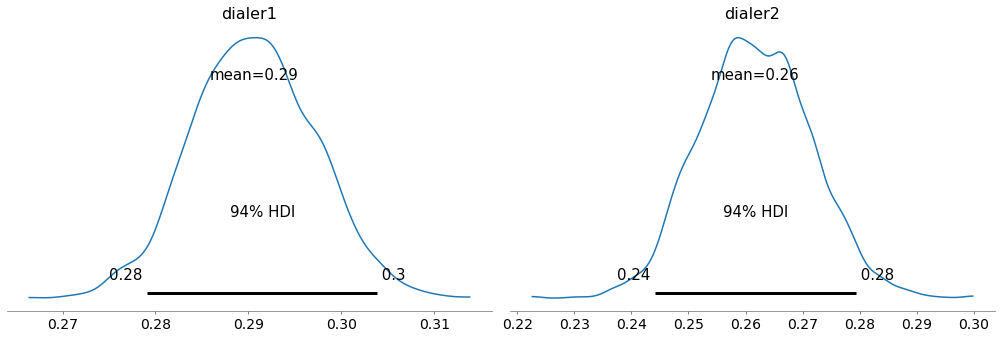

In [32]:
def create_bayesian_ab_test_model(
    variant_name_1, visitors_1, conversions_1, 
    variant_name_2, visitors_2, conversions_2, 
    prior_alpha=1, prior_beta=1):
    
    observations_1 = np.concatenate([np.ones(conversions_1), np.zeros(visitors_1)])
    observations_2 = np.concatenate([np.ones(conversions_2), np.zeros(visitors_2)])
    
    with pm.Model() as model:
        # priors
        prior1 = pm.Beta(variant_name_1, prior_alpha, prior_beta)
        prior2 = pm.Beta(variant_name_2, prior_alpha, prior_beta)

        observations_1 = pm.Bernoulli(variant_name_1 + '_likelihood', prior1, observed=observations_1)
        observations_2 = pm.Bernoulli(variant_name_2 + '_likelihood', prior2, observed=observations_2)
        
        trace = pm.sample(return_inferencedata=True)
        az.plot_posterior(trace)
        
    variant1_samples = trace.posterior[variant_name_1].values
    variant2_samples = trace.posterior[variant_name_2].values
    print(f'Probability that {variant_name_1} is better: {(variant2_samples > variant1_samples).mean() * 100}.')
        
    return model
        
create_bayesian_ab_test_model(
    'dialer1', 3417, 1399,
    'dialer2', 1525, 540
)